## Waste Management using CNN


In [102]:
# pip install opencv-python

In [101]:
# pip install tensorflow

In [100]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [103]:
# pip install pandas --index-url=https://pypi.org/simple

In [104]:
# pip install matplotlib --user

In [105]:
# pip install tqdm --user

In [41]:
train_path ="dataset/TRAIN"
test_path ="dataset/TEST"

In [106]:
# import Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [107]:
import cv2
import os
import pandas as pd
from glob import glob
from tqdm import tqdm  # Progress bar

train_path = "DATASET\\TRAIN"  # Update this with your actual path

x_data = []
y_data = []

for category in glob(os.path.join(train_path, '*')):  # Iterate through category folders
    for file in tqdm(glob(os.path.join(category, '*'))):  # Iterate through image files
        img_array = cv2.imread(file)

        if img_array is None:
            print(f"Warning: Skipping unreadable image {file}")  # Debugging print
            continue  # Skip if image is not loaded

        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        x_data.append(img_array)  # Append valid image
        y_data.append(os.path.basename(category))  # Append label (category name)

# Convert to DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})

# Debugging: Check if images are added
print(f"Total images loaded: {len(data)}")
print("DataFrame Preview:\n", data.head())

100%|██████████| 9999/9999 [00:09<00:00, 1024.22it/s]


Total images loaded: 22564
DataFrame Preview:
                                                image label
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...     O
1  [[[241, 242, 247], [241, 242, 247], [241, 242,...     O
2  [[[224, 224, 224], [229, 229, 229], [236, 236,...     O
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...     O
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     O


In [108]:
print("Example file:", glob(os.path.join(train_path, '*'))[:5])

Example file: ['DATASET\\TRAIN\\O', 'DATASET\\TRAIN\\R']


In [109]:
from cv2 import cvtColor
x_data =[]
y_data =[]
for category in glob(train_path +'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append((img_array))
        y_data.append(category.split('\\')[-1])
data = pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 9999/9999 [00:09<00:00, 1099.76it/s]


In [46]:
data.shape

(22564, 2)

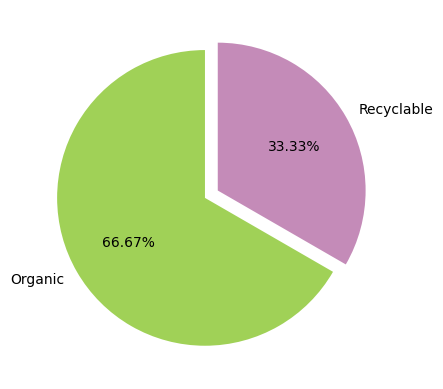

In [110]:
import matplotlib.pyplot as plt  # Import the required library
import pandas as pd  # Ensure pandas is also imported if you are using DataFrame

# Sample data for the pie chart (replace with your actual data)
data = pd.DataFrame({
    'label': ['Organic', 'Recyclable', 'Organic', 'Recyclable', 'Organic', 'Organic']
})

# Pie chart code
colors = ['#a0d157', '#c48bb8']
plt.pie(data['label'].value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', 
        colors=colors, startangle=90, explode=[0.05, 0.05])
plt.show()

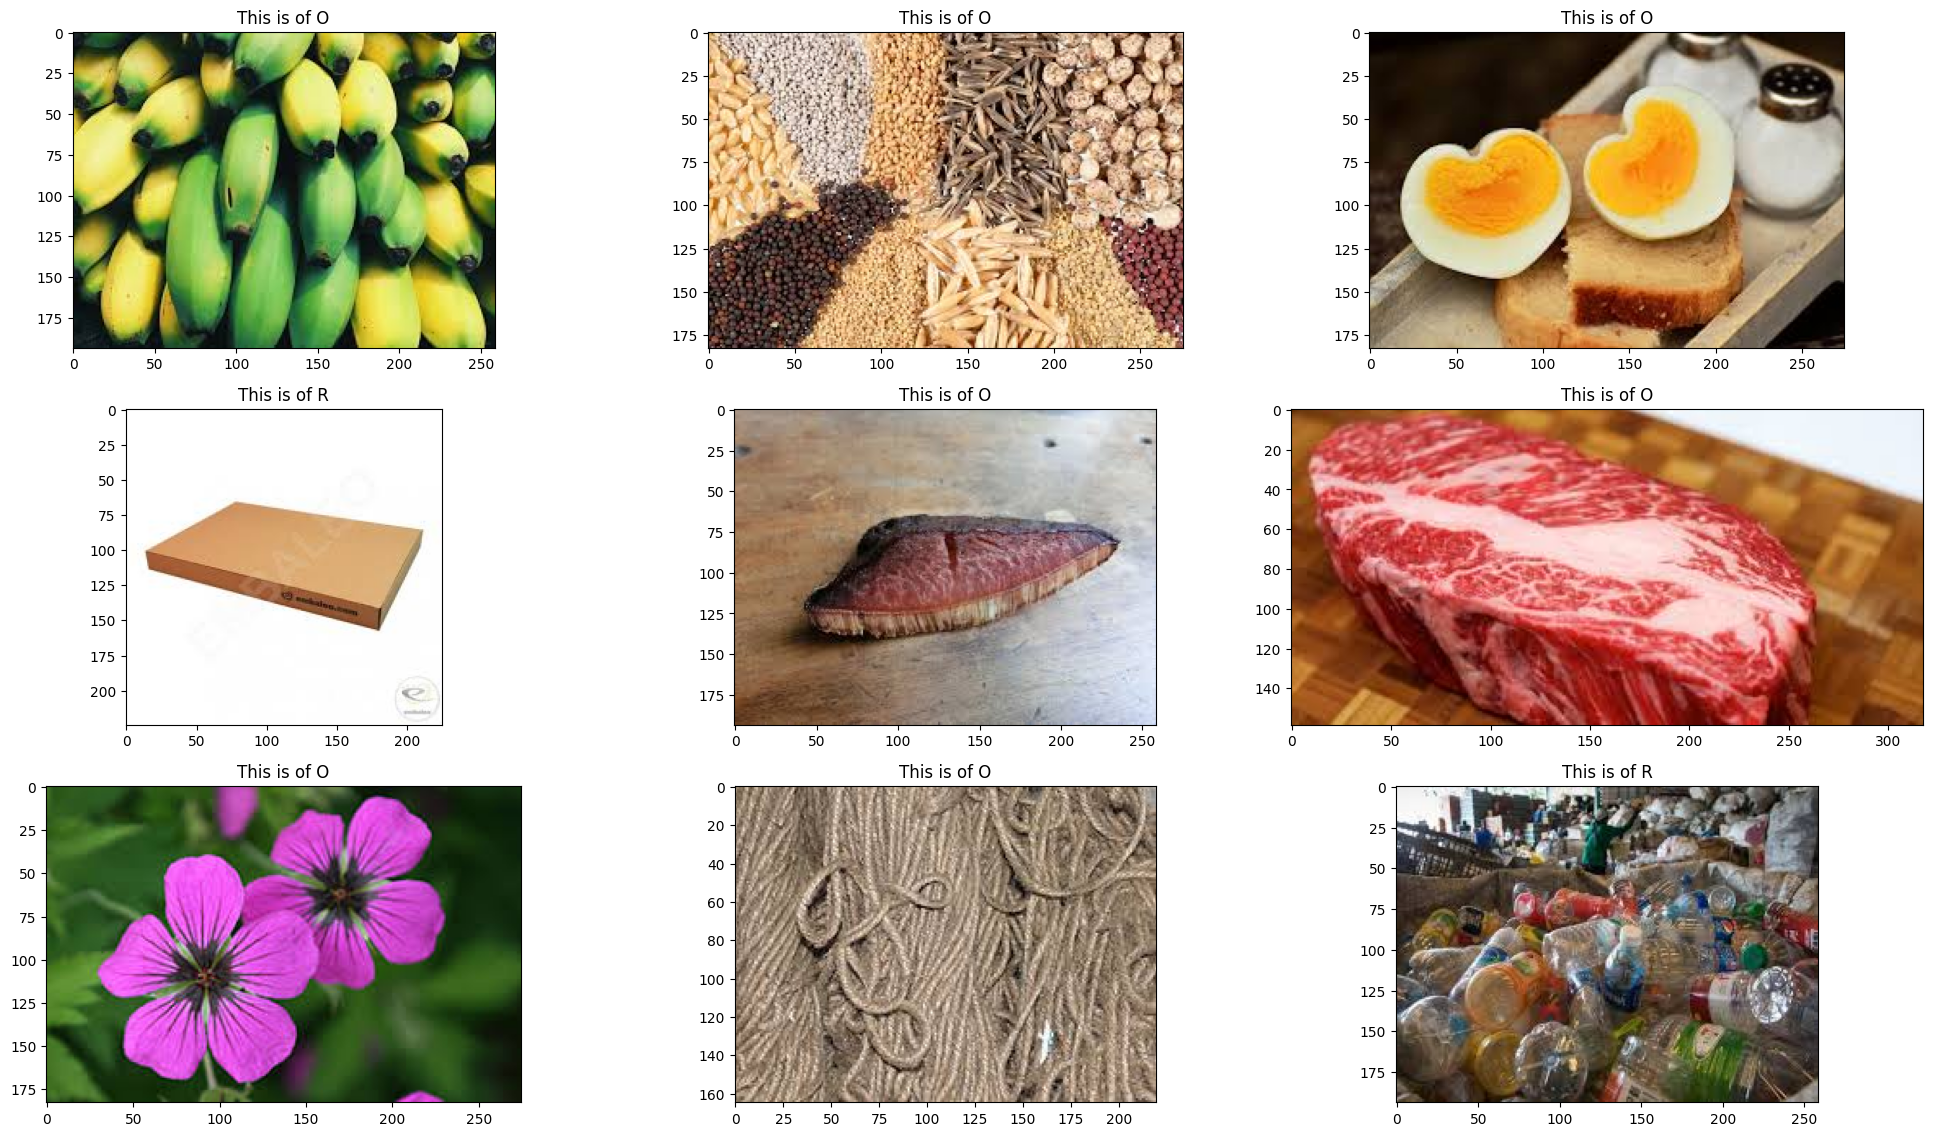

In [111]:
#to train

# Convert to DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data}) 

plt.figure(figsize=(20,15))

# Loop through 9 random images and display them
for i in range(9):
   plt.subplot(4,3,(i % 12) +1)
   index= np.random.randint(15000)
   plt.title('This is of {0}'. format(data.label[index]))
   plt.imshow(data.image[index])
   plt.tight_layout()

In [112]:
## CNN Convolutional Neural Network

In [113]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer = "adam",
              metrics =["accuracy"])
batch_size=256

In [51]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
train_datagen= ImageDataGenerator(rescale=1./255)

In [115]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [116]:


train_generator = train_datagen.flow_from_directory(
    train_path,                  # Path to your training data
    target_size=(224, 224),      # Resize images to match model input size
    batch_size=batch_size,       # Number of images per batch
    color_mode="rgb",            # Ensure images are in RGB format
    class_mode="categorical"     # For multi-class classification
)

# Load images from the directory for testing/validation
test_generator = test_datagen.flow_from_directory(
    test_path,                   # Path to your test data
    target_size=(224, 224),      # Resize images to match model input size
    batch_size=batch_size,       # Number of images per batch
    color_mode="rgb",            # Ensure images are in RGB format
    class_mode="categorical"     # For multi-class classification
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [61]:
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


# Define necessary variables for paths and batch size
train_path ="dataset/TRAIN"
test_path ="dataset/TEST"   

# Ensure dataset path exits
if not os.path.exists(train_path) or not os.path.exists(test_path): 
       raise FileNotFoundError("Dataset directories not found. Check 'train_path' and 'test_path'.") 

#Define batch size
batch_size = 32

# Define the ImageDataGenerator for train data or test data (Ensure it's initialized)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values


# Load images from the directory for training
train_generator = train_datagen.flow_from_directory(
    train_path,                  # Path to your training data
    target_size=(224, 224),      # Resize images to match model input size
    batch_size=batch_size,       # Number of images per batch
    color_mode="rgb",            # Ensure images are in RGB format
    class_mode="categorical"     # For multi-class classification
)

# Load images from the directory for testing/validation
test_generator = test_datagen.flow_from_directory(
    test_path,                   # Path to your test data
    target_size=(224, 224),      # Resize images to match model input size
    batch_size=batch_size,       # Number of images per batch
    color_mode="rgb",            # Ensure images are in RGB format
    class_mode="categorical"     # For multi-class classification
)

#Get number of classes dynamically
num_classes = train_generator.num_classes #Auto-detect classes

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Adjust for the number of classes in your data
])

#select the correct loss function based on class mode 
loss_function ='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy'

#compile te model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(
    train_generator,                # Training data
    epochs=9,                      # Number of epochs
    validation_data=test_generator  # Validation data
)

print("Model training completed successfully!")



Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Epoch 1/9
706/706 ━━━━━━━━━━━━━━━━━━━━ 613s 864ms/step - accuracy: 0.7783 - loss: 1.4973 - val_accuracy: 0.8715 - val_loss: 0.3921
Epoch 2/9
706/706 ━━━━━━━━━━━━━━━━━━━━ 649s 920ms/step - accuracy: 0.8744 - loss: 0.3094 - val_accuracy: 0.8337 - val_loss: 0.4375
Epoch 3/9
706/706 ━━━━━━━━━━━━━━━━━━━━ 653s 925ms/step - accuracy: 0.9204 - loss: 0.2054 - val_accuracy: 0.8599 - val_loss: 0.5027
Epoch 4/9
706/706 ━━━━━━━━━━━━━━━━━━━━ 626s 886ms/step - accuracy: 0.9566 - loss: 0.1282 - val_accuracy: 0.8556 - val_loss: 0.4182
Epoch 5/9
706/706 ━━━━━━━━━━━━━━━━━━━━ 684s 969ms/step - accuracy: 0.9684 - loss: 0.0964 - val_accuracy: 0.8337 - val_loss: 0.6157
Epoch 6/9
706/706 ━━━━━━━━━━━━━━━━━━━━ 741s 1s/step - accuracy: 0.9797 - loss: 0.0689 - val_accuracy: 0.8388 - val_loss: 0.7976
Epoch 7/9
706/706 ━━━━━━━━━━━━━━━━━━━━ 616s 872ms/step - accuracy: 0.9815 - loss: 0.0685 - val_accuracy: 0.8504 - val_loss: 0.6679
E

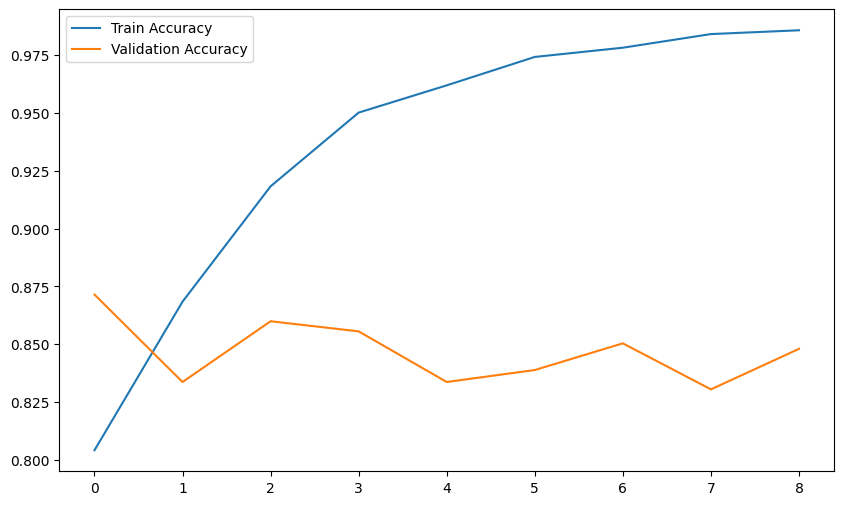

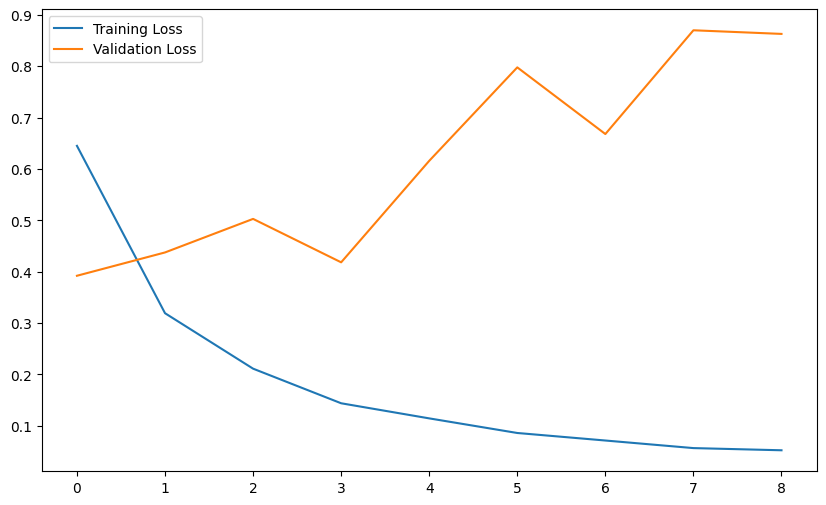

In [117]:
# Plot the training and validation accuracy
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss 
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [118]:
model.save('plastic_waste_classification_model.keras')

In [119]:
from tensorflow.keras.models import load_model
model=load_model('plastic_waste_classification_model.keras')

In [127]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_fun(img) :
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224, 3])
    result = np.argmax(model.predict(img))
    if result == 0:
        print('The image shown is Recyclable Waste')
    elif result == 1:
        print('The image shown is Organic Waste')

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
The image shown is Organic Waste


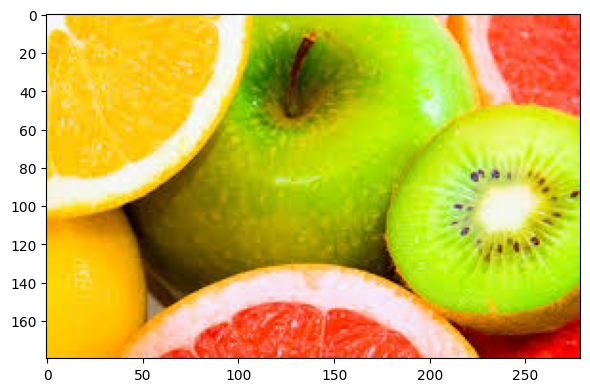

In [129]:
test_img = cv2.imread('DATASET\TEST\O\O_13933.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
The image shown is Organic Waste


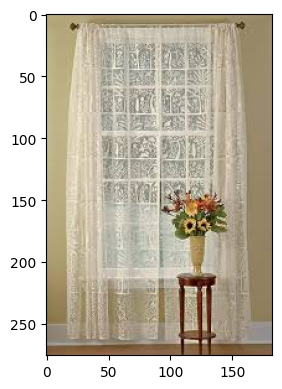

In [130]:
test_img = cv2.imread('DATASET\TEST\R\R_10139.jpg')
predict_fun(test_img)